In [1]:
import numpy as np
import pandas as pd
import itertools
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error

In [2]:
file_name = "price_work_copy.xlsx"

sh_gold = "Gold"
sh_slv = "Silver"
sh_pl = "Platinum"
sh_pa = "Palladium"
sh_cncpi = "CNCPI"
sh_uscpi = "USCPI"
sh_1mth = "1MthLibor"
sh_3mth = "3MthLibor"

df_gold = pd.read_excel(file_name, sheet_name=sh_gold)
df_gold['DATE'] = pd.to_datetime(df_gold['DATE'])

df_silver = pd.read_excel(file_name, sheet_name=sh_slv)
df_silver['DATE'] = pd.to_datetime(df_silver['DATE'])

df_platinum = pd.read_excel(file_name, sheet_name=sh_pl)
df_platinum['DATE'] = pd.to_datetime(df_platinum['DATE'])

df_palladium = pd.read_excel(file_name, sheet_name=sh_pa)
df_palladium['DATE'] = pd.to_datetime(df_palladium['DATE'])



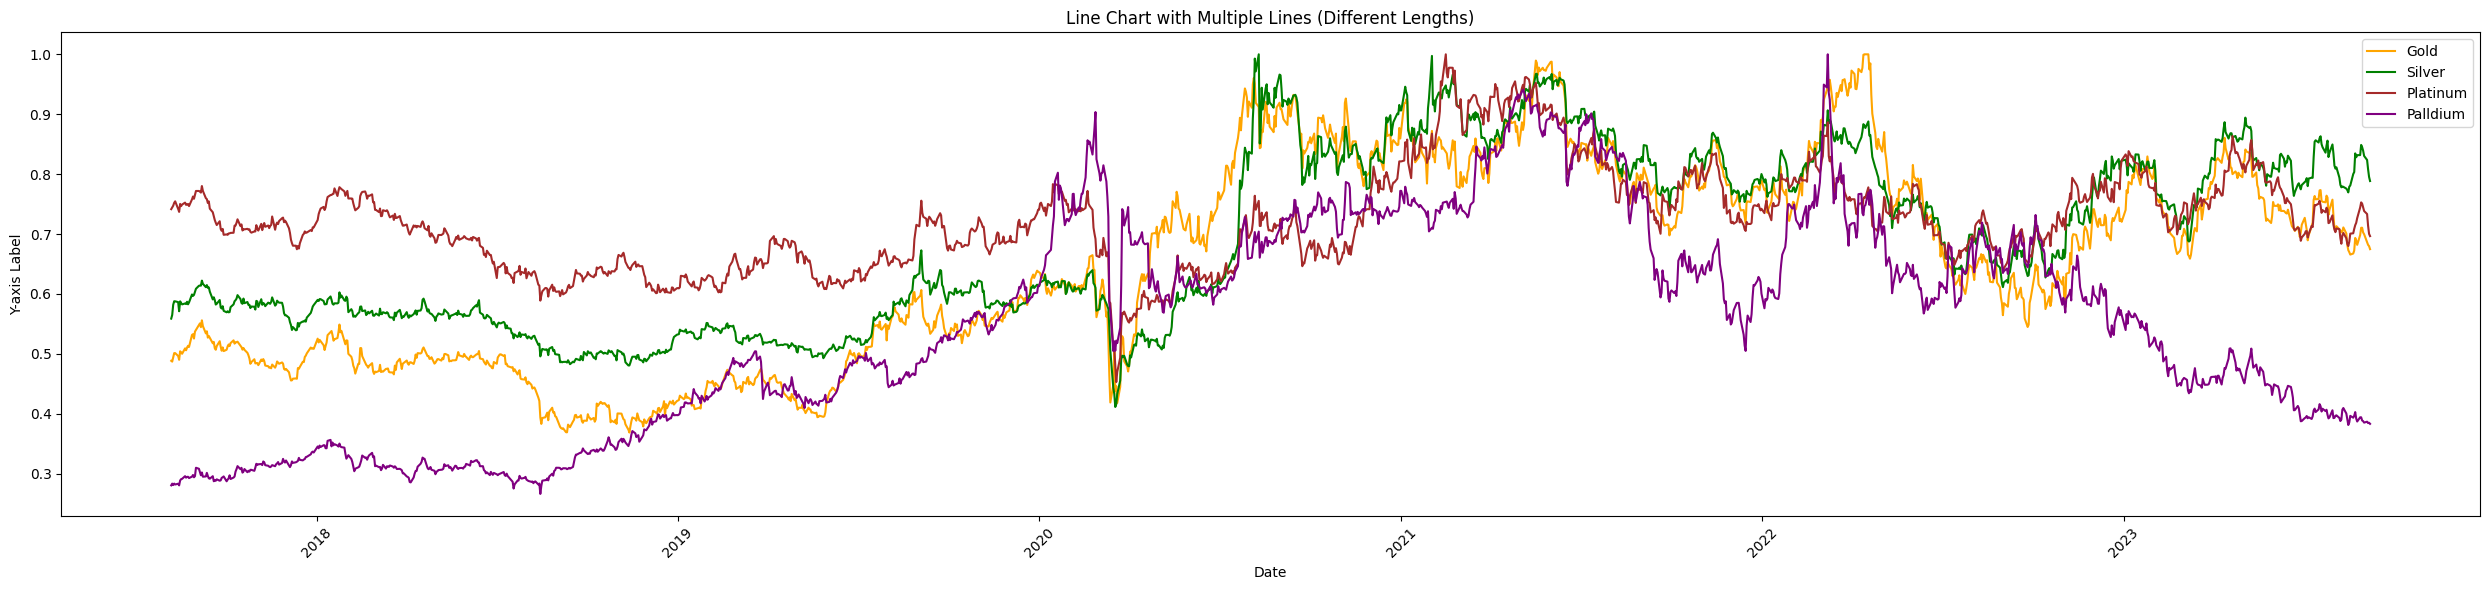

In [3]:

dt_gold = df_gold['DATE']
dt_silver = df_silver['DATE']
dt_platinum = df_platinum['DATE']
dt_palldium = df_palladium['DATE']

# Corresponding Y-axis values for two lines (different lengths)
y_gold = df_gold['PX_LAST']
y_silver = df_silver['PX_LAST']
y_platinum = df_platinum['PX_LAST']
y_palldium = df_palladium['PX_LAST']

# scale Y axis
y_gold_scaled = [val / max(y_gold) for val in y_gold]
y_silver_scaled = [val / max(y_silver) for val in y_silver]
y_pl_scaled = [val / max(y_platinum) for val in y_platinum]
y_pa_scaled = [val / max(y_palldium) for val in y_palldium]

# Create a line chart with multiple lines using the overlapping data
plt.figure(figsize=(25, 6))
plt.plot(dt_gold, y_gold_scaled, label='Gold', linestyle='-', color='orange')
plt.plot(dt_silver, y_silver_scaled, label='Silver', linestyle='-', color='green')
plt.plot(dt_platinum, y_pl_scaled, label='Platinum', linestyle='-', color='brown')
plt.plot(dt_palldium, y_pa_scaled, label='Palldium', linestyle='-', color='purple')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Y-axis Label')
plt.title('Line Chart with Multiple Lines (Different Lengths)')

# Format the date ticks on the X-axis for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()


In [4]:
# CUSUM
def cusum_change_point_detection(data, h=1/2, k=1):
    cusum = np.zeros(len(data))
    change_points = []

    for i in range(1, len(data)):
        cusum[i] = max(0, cusum[i-1] + (data[i] - np.mean(data[:i]) - k/2))

        if cusum[i] > h:
            change_points.append(i)

    return change_points, cusum

In [ ]:
# Set control chart parameters (h and k)
h = 1.5
k = 1
value_data = 

change_points, cusum_values = cusum_change_point_detection(data, h, k)
